In [1710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import cufflinks as cf
import datetime
%matplotlib inline
cf.go_offline

<function cufflinks.offline.go_offline(connected=False)>

In [1711]:
conn = pymysql.connect(host='localhost', user='root', password='Sk1ttles', db='nba_stats_prod')

In [1658]:
train_set = """select play.player_id,
       box_view.team,
       box_view.game_hash,
       box_view.game_date,
       box_view.home_away,
       basic.minutes_played,
       basic.fg,
       basic.fga,
       basic.fg_pct,
       basic.3p,
       basic.3pa,
       basic.3p_pct,
       basic.ft,
       basic.ft_pct,
       basic.orb,
       basic.drb,
       basic.trb,
       basic.ast,
       basic.stl,
       basic.blk,
       basic.tov,
       basic.pf,
       adv.true_shooting_pct,
       adv.effective_fg_pct,
       adv.3P_attempt_rate,
       adv.FT_attempt_rate,
       adv.offensive_reb_rate,
       adv.defensive_reb_rate,
       adv.total_reb_pct,
       adv.assist_pct,
       adv.steal_pct,
       adv.block_pct,
       adv.turnover_pct,
       adv.usage_pct,
       adv.offensive_rating,
       adv.defensive_rating,
       basic.pts
from box_scores_map_view as box_view
inner join game_date_lookup as lu on box_view.game_date = lu.day
inner join player_team_map as play_m on ( (box_view.team = play_m.team) and (
        lu.season = play_m.season) )
inner join basic_box_stats as basic on ( (box_view.game_hash = basic.game_hash) and (
        play_m.player_id = basic.player_id) )
inner join advanced_box_stats as adv on ( (box_view.game_hash = adv.game_hash) and (
        play_m.player_id = adv.player_id) )
inner join player_info as play on play_m.player_id = play.player_id
where lu.season >= 2014 and
      box_view.game_hash not in (select game_hash
                                 from box_scores_map_view
                                 where team like 'Washington%' and
                                       game_date > (select max(game_date) -26  from box_scores_map_view where team like 'Washington%'))
order by box_view.game_date desc"""

In [1659]:
test_set = """select player.player_id,
       bm.team,
       bm.home_away,
       basic.minutes_played,
       basic.fg,
       basic.fga,
       basic.fg_pct,
       basic.3p,
       basic.3pa,
       basic.3p_pct,
       basic.ft,
       basic.ft_pct,
       basic.orb,
       basic.drb,
       basic.trb,
       basic.ast,
       basic.stl,
       basic.blk,
       basic.tov,
       basic.pf,
       adv.true_shooting_pct,
       adv.effective_fg_pct,
       adv.3P_attempt_rate,
       adv.FT_attempt_rate,
       adv.offensive_reb_rate,
       adv.defensive_reb_rate,
       adv.total_reb_pct,
       adv.assist_pct,
       adv.steal_pct,
       adv.block_pct,
       adv.turnover_pct,
       adv.usage_pct,
       adv.offensive_rating,
       adv.defensive_rating,
       basic.pts
from (

    select game_hash, team, game_date, home_away
    from box_scores_map_view
    where team like 'Washington%' /*and
          game_date = (select max(game_date) from box_scores_map_view where team like 'Washington%')*/
     order by game_date desc limit 12

         ) as bm
inner join game_date_lookup as lu on bm.game_date = lu.day

inner join (

    select player_id, team
    from player_team_map
    where team like 'Washington%' and
          season = 2018

    ) as player on bm.team = player.team

inner join basic_box_stats as basic on ( (bm.game_hash = basic.game_hash) and (player.player_id = basic.player_id) )
inner join advanced_box_stats as adv on ( (bm.game_hash = adv.game_hash) and (player.player_id = adv.player_id) )
where bm.team like 'Washington%' and
      lu.season = 2018"""

In [1684]:
train_df = pd.read_sql(train_set, con=conn)

In [1685]:
test_df = pd.read_sql(test_set, con=conn)

In [1662]:
#sns.jointplot(x='fg_pct', y='pts', data=home_box_data, kind='kde')

In [1663]:
#sns.pairplot(box_data, hue='home_away')

In [1664]:
#sns.jointplot(x='pts', y='3p_pct', data=box_data)

In [1665]:
#sns.jointplot(x='fg_pct', y='pts', data=box_data)

In [1666]:
train_df.columns

Index(['player_id', 'team', 'game_hash', 'game_date', 'home_away',
       'minutes_played', 'fg', 'fga', 'fg_pct', '3p', '3pa', '3p_pct', 'ft',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'true_shooting_pct', 'effective_fg_pct', '3P_attempt_rate',
       'FT_attempt_rate', 'offensive_reb_rate', 'defensive_reb_rate',
       'total_reb_pct', 'assist_pct', 'steal_pct', 'block_pct', 'turnover_pct',
       'usage_pct', 'offensive_rating', 'defensive_rating', 'pts'],
      dtype='object')

In [1667]:
#box_num_data = box_data[['FG', 'FGA',
 #      'FG_PCT', '3P', '3PA', '3P_PCT', 'FT', 'FT_PCT', 'ORB', 'DRB', 'TRB',
  #     'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'plus_minus']]

In [1668]:
#sns.pairplot(box_data)

In [1669]:
#sns.jointplot(x='fga', y='pts', data=box_data, kind='reg')

In [1670]:
#sns.lmplot(x='fg_pct', y='pts', data=box_data)

In [1671]:
#box_data['fg_pct'].head(100).iplot(kind='scatter')

In [1672]:
train_df.count()

player_id             133343
team                  133343
game_hash             133343
game_date             133343
home_away             133343
minutes_played        133343
fg                    133343
fga                   133343
fg_pct                133343
3p                    133343
3pa                   133343
3p_pct                133343
ft                    133343
ft_pct                133343
orb                   133343
drb                   133343
trb                   133343
ast                   133343
stl                   133343
blk                   133343
tov                   133343
pf                    133343
true_shooting_pct     133343
effective_fg_pct      133343
3P_attempt_rate       133343
FT_attempt_rate       133343
offensive_reb_rate    133343
defensive_reb_rate    133343
total_reb_pct         133343
assist_pct            133343
steal_pct             133343
block_pct             133343
turnover_pct          133343
usage_pct             133343
offensive_rati

In [1673]:
def time_convert(time):
    time_list = time.split(':')
 #   print(time_list)
    try:
        return ((int(time_list[0]) * 60) + int(time_list[1]))
    except ValueError:
        return 0
   # return int(time[0])*60 + int(time[1])

In [1686]:
train_df[train_df['minutes_played'] ==''].head()

,player_id,team,game_hash,game_date,home_away,minutes_played,fg,fga,fg_pct,3p,...,defensive_reb_rate,total_reb_pct,assist_pct,steal_pct,block_pct,turnover_pct,usage_pct,offensive_rating,defensive_rating,pts
27802,2596111,Indiana Pacers,d98d8c7cd5feb837fb053e8b9b84d0eb,2017-04-10,Away,,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
103888,5352848,Sacramento Kings,a4c7f534fd805f3b450a0618fbf448fb,2014-11-13,Away,,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1687]:
train_df['minutes_played'] = train_df['minutes_played'].apply(time_convert)

In [1688]:
test_df['minutes_played'] = test_df['minutes_played'].apply(time_convert)

In [1689]:
train_results = pd.get_dummies(train_df['home_away'], drop_first=True)
train_df = pd.concat([train_df, train_results], axis=1)

test_results = pd.get_dummies(test_df['home_away'], drop_first=True)
test_df = pd.concat([test_df, test_results], axis=1)


In [1690]:
train_df.drop(['player_id', 'team', 'game_hash', 'game_date', 'home_away'], axis=1, inplace=True)
test_df.drop(['home_away'], axis=1, inplace=True)

In [1691]:
train_df.columns

Index(['minutes_played', 'fg', 'fga', 'fg_pct', '3p', '3pa', '3p_pct', 'ft',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'true_shooting_pct', 'effective_fg_pct', '3P_attempt_rate',
       'FT_attempt_rate', 'offensive_reb_rate', 'defensive_reb_rate',
       'total_reb_pct', 'assist_pct', 'steal_pct', 'block_pct', 'turnover_pct',
       'usage_pct', 'offensive_rating', 'defensive_rating', 'pts', 'Home'],
      dtype='object')

In [1692]:
test_df.columns

Index(['player_id', 'team', 'minutes_played', 'fg', 'fga', 'fg_pct', '3p',
       '3pa', '3p_pct', 'ft', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'true_shooting_pct', 'effective_fg_pct',
       '3P_attempt_rate', 'FT_attempt_rate', 'offensive_reb_rate',
       'defensive_reb_rate', 'total_reb_pct', 'assist_pct', 'steal_pct',
       'block_pct', 'turnover_pct', 'usage_pct', 'offensive_rating',
       'defensive_rating', 'pts', 'Home'],
      dtype='object')

In [1693]:
X_train = train_df[['minutes_played', 'fga', 'fg_pct', '3pa', '3p_pct',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'true_shooting_pct', 'effective_fg_pct', '3P_attempt_rate',
       'FT_attempt_rate', 'offensive_reb_rate', 'defensive_reb_rate',
       'total_reb_pct', 'assist_pct', 'steal_pct', 'block_pct', 'turnover_pct', 'Home']]
y_train = train_df['pts']

In [1694]:
X_train.head(10)

,minutes_played,fga,fg_pct,3pa,3p_pct,ft_pct,orb,drb,trb,ast,...,3P_attempt_rate,FT_attempt_rate,offensive_reb_rate,defensive_reb_rate,total_reb_pct,assist_pct,steal_pct,block_pct,turnover_pct,Home
0,1016,4,0.500,2,0.500,0.000,0,0,0,0,...,0.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2261,22,0.455,8,0.250,1.000,1,5,6,3,...,0.364,0.045,2.5,14.2,8.0,10.8,1.2,0.0,0.0,1
2,1916,15,0.467,5,0.600,1.000,1,2,3,5,...,0.333,0.333,3.3,8.4,5.6,27.4,1.7,0.0,10.4,0
3,2445,18,0.500,5,0.200,0.000,5,9,14,9,...,0.278,0.000,11.5,23.6,17.2,28.3,3.4,3.7,18.2,1
4,2742,26,0.500,2,0.500,0.778,2,17,19,1,...,0.077,0.346,4.7,35.0,20.8,3.8,1.0,4.4,9.1,0
5,1991,11,0.182,5,0.200,0.500,2,6,8,0,...,0.455,0.182,6.4,24.1,14.3,0.0,1.6,0.0,20.2,0
6,2245,9,0.444,6,0.500,0.500,0,7,7,1,...,0.667,0.222,0.0,17.6,9.4,3.6,0.0,0.0,9.2,0
7,2424,12,0.333,3,0.333,0.500,1,1,2,4,...,0.250,0.167,2.6,2.3,2.5,13.1,0.0,0.0,23.7,0
8,1226,5,0.600,2,0.500,1.000,0,2,2,2,...,0.400,0.200,0.0,10.4,5.8,14.3,2.6,0.0,26.9,1
9,1846,8,0.250,5,0.200,0.000,0,3,3,2,...,0.625,0.000,0.0,10.4,5.8,8.5,0.0,0.0,20.0,1


In [1564]:
dr

In [1695]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [1696]:
from sklearn.linear_model import LinearRegression

In [1697]:
lm = LinearRegression()

In [1698]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1699]:
lm.coef_

array([ -9.69164035e-04,   1.06925960e+00,   4.07590915e+00,
         2.53051378e-01,   2.72394765e+00,   1.60458816e+00,
        -2.17548218e-02,   9.48964967e-02,   7.31416749e-02,
        -1.68589222e-02,   1.20357102e-01,   2.01301795e-01,
         1.07443735e-01,  -5.71077675e-02,   4.61670104e+00,
        -8.45806361e-01,  -2.09294848e+00,   1.43994984e+00,
        -9.01153319e-02,  -9.26556903e-02,   1.46797925e-01,
         3.40833120e-03,  -3.90631220e-02,  -2.84820978e-02,
         7.90059427e-04,   1.32511632e-01])

In [1700]:
predictions = lm.predict(X_test)

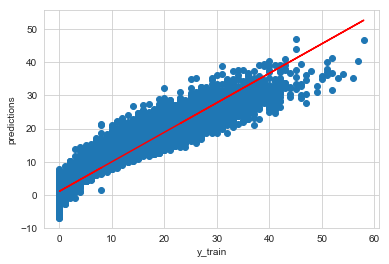

In [1701]:
plt.scatter(y_test, predictions)
plt.xlabel('y_train')
plt.ylabel('predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r")

In [1703]:
lm.score(X_test, y_test)

0.88995864022616156

In [1709]:
#pred_df = pd.concat([pd.DataFrame(y_test, index=None), pd.DataFrame(predictions, index=None)], axis =1)

#pred_df
#sns.lmplot(x=y_test, y=predictions, data=pred_df)

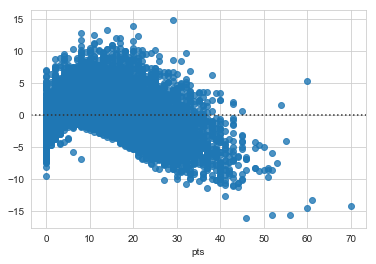

In [1587]:
sns.set_style('whitegrid')
sns.residplot(x=y_test, y=predictions)

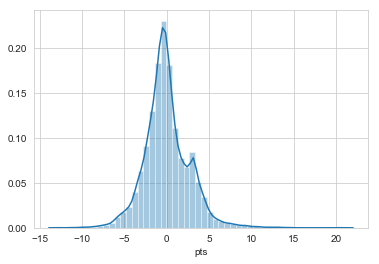

In [1574]:
sns.distplot(y_test-predictions, bins=50)

In [1575]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])

In [1576]:
coeff_df

,Coefficient
minutes_played,-0.000969
fga,1.071276
fg_pct,3.903490
3pa,0.247406
3p_pct,2.704487
ft_pct,1.633534
orb,-0.028249
drb,0.096961
trb,0.068712
ast,-0.012351


In [1612]:
test_df.columns

Index(['player_id', 'team', 'minutes_played', 'fg', 'fga', 'fg_pct', '3p',
       '3pa', '3p_pct', 'ft', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'true_shooting_pct', 'effective_fg_pct',
       '3P_attempt_rate', 'FT_attempt_rate', 'offensive_reb_rate',
       'defensive_reb_rate', 'total_reb_pct', 'assist_pct', 'steal_pct',
       'block_pct', 'turnover_pct', 'usage_pct', 'offensive_rating',
       'defensive_rating', 'pts', 'Home'],
      dtype='object')

In [1623]:
test_df = test_df.groupby(['player_id', 'team']).mean()

In [1643]:
test_df.iloc[0, :]

minutes_played        474.428571
fg                      0.571429
fga                     1.714286
fg_pct                  0.157143
3p                      0.142857
3pa                     0.285714
3p_pct                  0.142857
ft                      0.000000
ft_pct                  0.000000
orb                     0.000000
drb                     1.428571
trb                     1.428571
ast                     1.857143
stl                     0.857143
blk                     0.000000
tov                     0.285714
pf                      1.142857
true_shooting_pct       0.171429
effective_fg_pct        0.171429
3P_attempt_rate         0.171429
FT_attempt_rate         0.000000
offensive_reb_rate      0.000000
defensive_reb_rate     19.114286
total_reb_pct           9.628571
assist_pct             36.257143
steal_pct               4.285714
block_pct               0.000000
turnover_pct            5.957143
usage_pct               8.042857
offensive_rating       93.714286
defensive_

In [1638]:
X_test = test_df[['minutes_played', 'fga', 'fg_pct', '3pa', '3p_pct', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'true_shooting_pct',
       'effective_fg_pct', '3P_attempt_rate', 'FT_attempt_rate',
       'offensive_reb_rate', 'defensive_reb_rate', 'total_reb_pct',
       'assist_pct', 'steal_pct', 'block_pct', 'turnover_pct', 'Home']]
y_test = test_df['pts']

In [1626]:
#X_train, X_test, y_train, y_test = train_test_split(X_away, y_away, test_size=.33)

In [1627]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1628]:
lm.coef_

array([ -9.68812431e-04,   1.07113855e+00,   3.84203060e+00,
         2.49862530e-01,   2.68872693e+00,   1.60345214e+00,
        -2.15358071e-02,   9.37971129e-02,   7.22613058e-02,
        -1.13688698e-02,   1.25000981e-01,   1.85793960e-01,
         1.00502658e-01,  -5.73700065e-02,   4.60281247e+00,
        -6.10548347e-01,  -2.08189569e+00,   1.42787755e+00,
        -8.51260225e-02,  -8.70651809e-02,   1.35967057e-01,
         2.70760022e-03,  -4.09166245e-02,  -2.49966107e-02,
         6.71574661e-04,   1.28853126e-01])

In [1629]:
predictions = lm.predict(X_test)

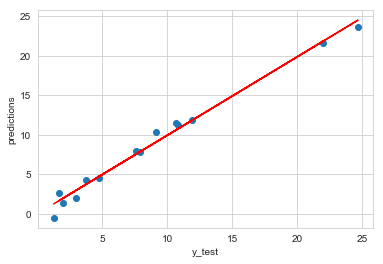

In [1634]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r")

In [1631]:
lm.score(X_test, y_test)

0.98610988843183611

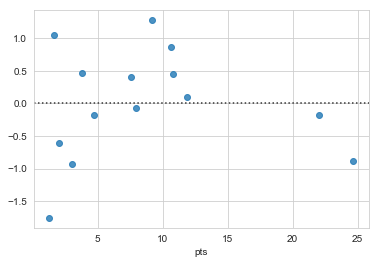

In [1632]:
sns.residplot(x=y_test, y=predictions)

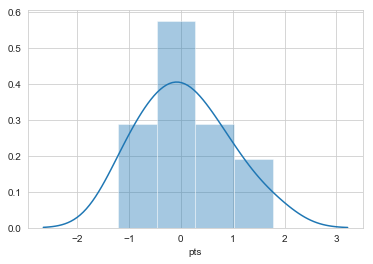

In [1633]:
sns.distplot(y_test-predictions)